In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[2] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

calc_errors = True

AllModels.clear()
Xset.parallel.error = 20



pd.set_option('display.max_columns', 500)

# prod_shift = 0  #0 or 1

# if prod_shift == 0:
#     prodpath_ph_res = 'phase_resolved' 
# elif prod_shift == 1:
#     prodpath_ph_res = 'phase_resolved_shift_1' 


###
Observation 90302319006 loaded successfully


# Observation 90302319004

## Phase-averaged spectra

### cutoffpl (2 gauss, one bb)

Model: constant*phabs(gaussian + gaussian + edge(cutoffpl + bbodyrad))

P#   C#   Component    Parameter  Unit    Value           Errors      
----------------------------------------------------------------------------
1    1    constant     factor             1.0                           (0.0       , 0.0       )
2    2    phabs        nH         10^22   0.8                           (0.0       , 0.0       )
3    3    gaussian     LineE      keV     6.4                           (0.0       , 0.0       )
4    3    gaussian     Sigma      keV     1.6                           (0.0       , 0.0       )
5    3    gaussian     norm               1.4                           (0.0       , 0.0       )
6    4    gaussian_4   LineE      keV     6.67                          (0.0       , 0.0       )
7    4    gaussian_4   Sigma      keV     0.05                          (0.0       , 0.0       )
8    4    gaussian_4   norm               0.03                          (0.0       , 0.0       )
9   

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319006_cutoffpl_FPMA,constant,factor,1,1.0,0.0,0.0,FFFFFFFFF,0.0,True,
1,0,90302319006_cutoffpl_FPMA,phabs,nH,2,0.8,0.0,0.0,FFFFFFFFF,0.0,True,
2,0,90302319006_cutoffpl_FPMA,gaussian,LineE,3,6.4,0.0,0.0,FFFFFFFFF,0.0,True,
3,0,90302319006_cutoffpl_FPMA,gaussian,Sigma,4,1.69016,1.67114,1.708377,FFFFFFFFF,0.017492,False,
4,0,90302319006_cutoffpl_FPMA,gaussian,norm,5,1.207911,1.150415,1.266064,FFFFFFFFF,0.054988,False,
5,0,90302319006_cutoffpl_FPMA,gaussian_4,LineE,6,6.67,0.0,0.0,FFFFFFFFF,0.0,True,
6,0,90302319006_cutoffpl_FPMA,gaussian_4,Sigma,7,0.05,0.0,0.0,FFFFFFFFF,0.0,True,
7,0,90302319006_cutoffpl_FPMA,gaussian_4,norm,8,0.018916,0.016382,0.021427,FFFFFFFFF,0.0025,False,
8,0,90302319006_cutoffpl_FPMA,edge,edgeE,9,7.1,0.0,0.0,FFFFFFFFF,0.0,True,
9,0,90302319006_cutoffpl_FPMA,edge,MaxTau,10,0.123436,0.115434,0.131694,FFFFFFFFF,0.007826,False,


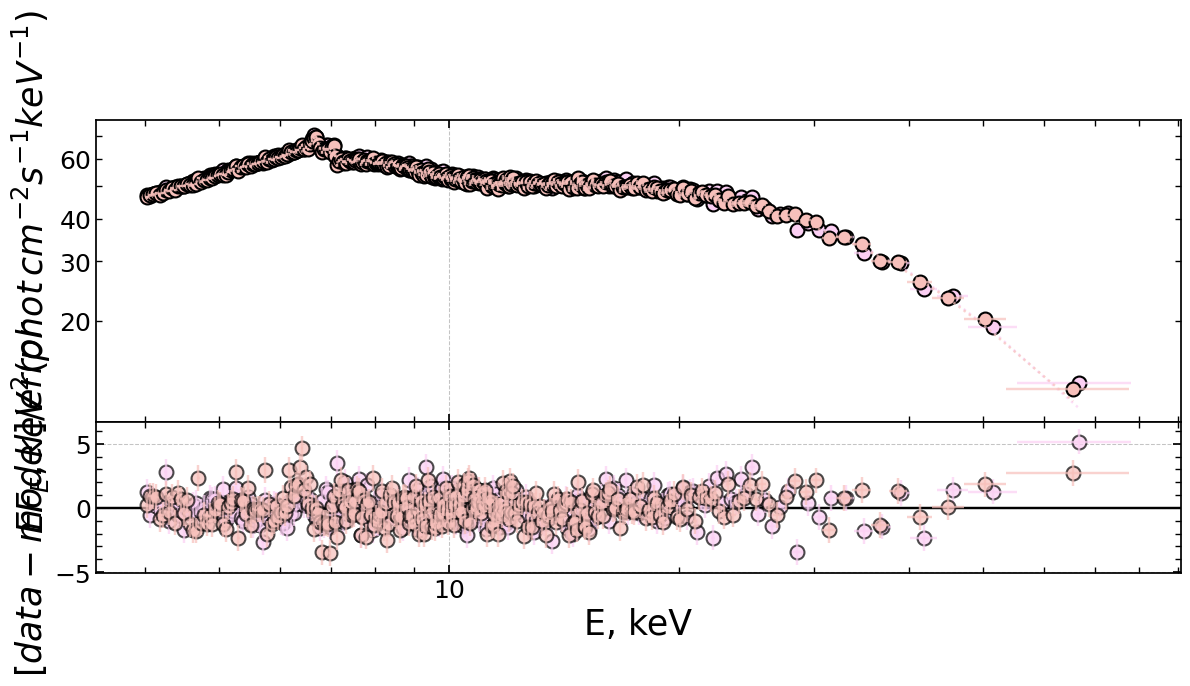

In [3]:
os.chdir(ph_ave_folder)
create_dir('xspec')


mo_cutoffpl = Model("constant*phabs*( gaussian  + gaussian +edge*(cutoffpl+bbodyrad))")
mo_cutoffpl.phabs.nH = '0.8 -1'

mo_cutoffpl.cutoffpl.PhoIndex = '1.3'
mo_cutoffpl.cutoffpl.HighECut = '20' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.cutoffpl.norm = '10'

mo_cutoffpl.bbodyrad.kT = '0.8'
mo_cutoffpl.bbodyrad.norm = '4e3' # ,, 0.1, 0.2, 3, 4'


mo_cutoffpl.gaussian.LineE = '6.4 -1'
mo_cutoffpl.gaussian.Sigma = '1.6 ' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian.norm = '1.4'

mo_cutoffpl.gaussian_4.LineE = '6.67 -1'
mo_cutoffpl.gaussian_4.Sigma = '0.05 -1' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian_4.norm = '0.03'

mo_cutoffpl.edge.edgeE = '7.1 -1 ,, 6,6.5,7.5,8' #this is like setting nh with hard and soft limits limits:  newpar 2 ,,0.3,0.3,2,2
mo_cutoffpl.edge.MaxTau = '0.1 '
#mo_cutoffpl.smedge.index = '0 -1 '
#mo_cutoffpl.smedge.width = '0.1 -1 '
showmodel(mo_cutoffpl)



model = mo_cutoffpl
model_name = 'cutoffpl'
mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors)
mo_fid_pars

## Phase-resolved spectra

### cutoffpl (2 gauss, one bb)

#### fit

In [3]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/cutoffpl/xcm/{ObsID}_cutoffpl.xcm_model')
mo_cutoffpl_loaded = AllModels(1)
mo_cutoffpl_loaded.gaussian_4.norm.frozen = True
mo_cutoffpl_loaded.gaussian.Sigma.frozen = True
#mo_cutoffpl_loaded.gsmooth.Sig_6keV.frozen = True

#showmodel(mo_cutoffpl_loaded);

##################### bin number 6 #####################
deleted xspec/cutoffpl/*90302319006_bin6_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319006_bin6_shift0_cutoffpl* files
Try loading storage xspec/cutoffpl/90302319006_bin6_shift0_cutoffpl.storage
no storage found. fitting...


rm: cannot remove 'xspec/cutoffpl/*90302319006_bin6_shift0_cutoffpl*': No such file or directory
rm: cannot remove 'xspec/cutoffpl/xcm/*90302319006_bin6_shift0_cutoffpl*': No such file or directory


 loaded phase_resolved_bin6A_sr.pi and phase_resolved_bin6B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
perturbing ininital guess before fitting
fitting done
skipping errors for: []
    16     0.991477     0.997572    (-0.0030408,0.00305465)
     5      1.04724      1.22857    (-0.0904632,0.0908755)
    10     0.131878     0.165517    (-0.0163172,0.0173214)
    11      1.21132      1.34081    (-0.0671996,0.0622904)
    12      15.1043      16.5689    (-0.716074,0.748565)
    13      12.4713      16.3522    (-1.90201,1.97893)
    14      0.98985      1.15127    (-0.088501,0.0729175)
    15      1065.42      1747.65    (-266.299,415.93)
Fit done 
 chi2 = 1280.6987809143384 for 1206 dof, chi2_red = 1.061939287656997, H0 prob = 0.06626802823
<Storage with 2 containers>
##################### bin number 7 #####################
deleted xspec/cutoffpl/*90302319006_bin7_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319006_bin7_shift0_cutoffpl* files
Try loading storage xsp

rm: cannot remove 'xspec/cutoffpl/*90302319006_bin7_shift0_cutoffpl*': No such file or directory


 loaded phase_resolved_bin7A_sr.pi and phase_resolved_bin7B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
perturbing ininital guess before fitting
fitting done
skipping errors for: []
    16     0.983014     0.988976    (-0.00297457,0.00298789)
     5      1.06661      1.28541    (-0.108796,0.11)
    10    0.0901787     0.117833    (-0.013659,0.0139956)
    11      1.37301      1.50083    (-0.0654763,0.0623422)
    12      19.1008       21.243    (-1.03763,1.10453)
Fit done 
 chi2 = 1202.4534701241141 for 1249 dof, chi2_red = 0.9627329624692668, H0 prob = 0.8237495437
    13      22.5338      29.8007    (-3.46848,3.79846)
    14       1.2185      1.33736    (-0.067142,0.0517153)
    15      544.619       968.26    (-214.824,208.816)
<Storage with 2 containers>
##################### bin number 8 #####################
deleted xspec/cutoffpl/*90302319006_bin8_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319006_bin8_shift0_cutoffpl* files
Try loading storage xspec/cuto

rm: cannot remove 'xspec/cutoffpl/*90302319006_bin8_shift0_cutoffpl*': No such file or directory


 loaded phase_resolved_bin8A_sr.pi and phase_resolved_bin8B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
perturbing ininital guess before fitting
fitting done
skipping errors for: []
    16     0.987605     0.993676    (-0.00302822,0.00304203)
     5      1.16741       1.4014    (-0.120494,0.113493)
    10     0.118373     0.156083    (-0.018122,0.0195876)
    11       1.1955      1.32406    (-0.0678064,0.0607485)
    12      14.2683      15.5786    (-0.648248,0.662039)
    13      13.6395      17.8354    (-2.09573,2.10023)
    14     0.932537        1.107    (-0.0914793,0.082981)
    15      1595.17      2864.59    (-456.136,813.286)
Fit done 
 chi2 = 1243.5253483762394 for 1181 dof, chi2_red = 1.05294271666066, H0 prob = 0.1005983308
<Storage with 2 containers>
##################### bin number 9 #####################
deleted xspec/cutoffpl/*90302319006_bin9_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319006_bin9_shift0_cutoffpl* files
Try loading storage xspec/

rm: cannot remove 'xspec/cutoffpl/*90302319006_bin9_shift0_cutoffpl*': No such file or directory


 loaded phase_resolved_bin9A_sr.pi and phase_resolved_bin9B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
perturbing ininital guess before fitting
fitting done
skipping errors for: []
    16     0.987015     0.993125    (-0.00304827,0.00306225)
     5      1.17697      1.34679    (-0.0857397,0.0840769)
    10     0.177533     0.214178    (-0.0178295,0.018815)
    11      1.11817      1.24814    (-0.0671055,0.0628672)
    12      13.5128      14.7121    (-0.587392,0.611868)
    13      10.4081      13.6173    (-1.56261,1.64658)
    14     0.974168       1.1072    (-0.0699111,0.0631253)
Fit done 
 chi2 = 1214.1870996859468 for 1178 dof, chi2_red = 1.0307190999031806, H0 prob = 0.2261060749
    15      1479.45      2271.74    (-318.904,473.385)
<Storage with 2 containers>
##################### bin number 10 #####################
deleted xspec/cutoffpl/*90302319006_bin10_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319006_bin10_shift0_cutoffpl* files
Try loading storag

rm: cannot remove 'xspec/cutoffpl/*90302319006_bin10_shift0_cutoffpl*': No such file or directory


 loaded phase_resolved_bin10A_sr.pi and phase_resolved_bin10B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
perturbing ininital guess before fitting
fitting done
skipping errors for: []
    16     0.983355     0.989292    (-0.00296232,0.00297558)
     5      1.45064      1.70781    (-0.139208,0.117961)
    10    0.0972286     0.130282    (-0.0160283,0.017025)
    11      1.39795      1.49072    (-0.047682,0.0450863)
    12      20.3483      22.3136    (-0.952584,1.01266)
    13      27.1518      32.8542    (-2.83282,2.86954)
    14     0.817555      1.09896    (-0.139543,0.141863)
Fit done 
 chi2 = 1277.7615879649727 for 1279 dof, chi2_red = 0.9990317341399317, H0 prob = 0.5045122899
    15      1058.37      3537.58    (-759.943,1719.26)
<Storage with 2 containers>


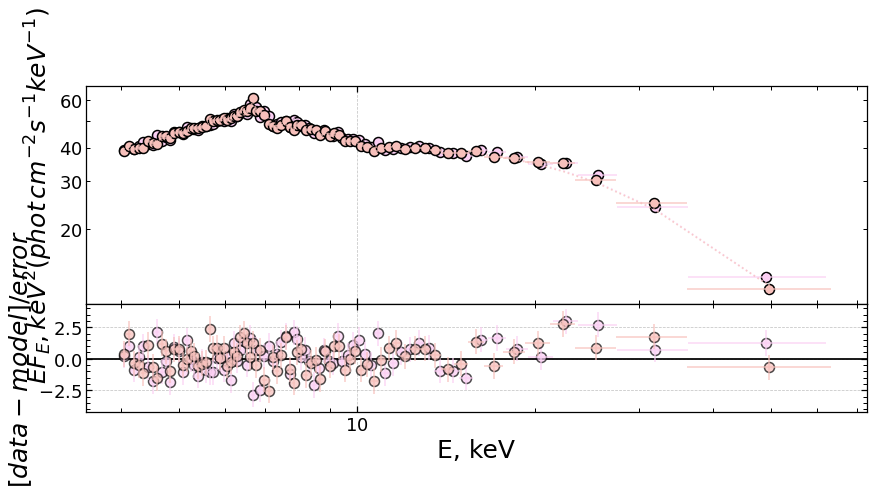

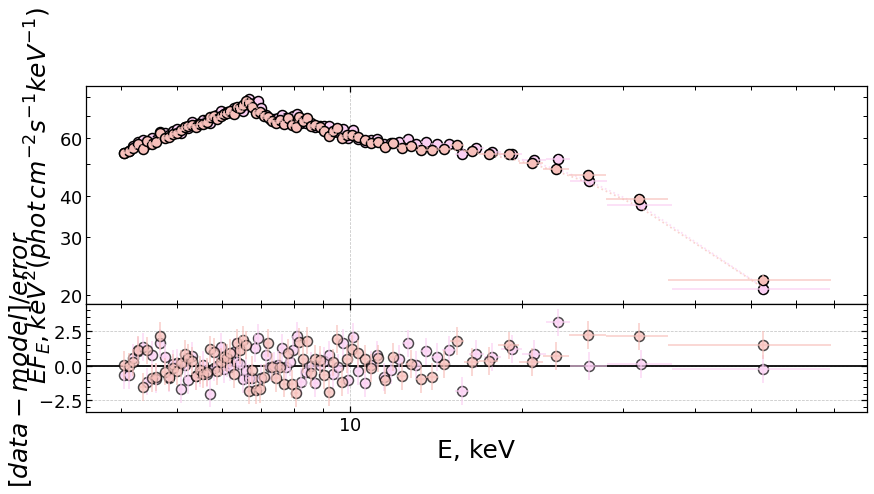

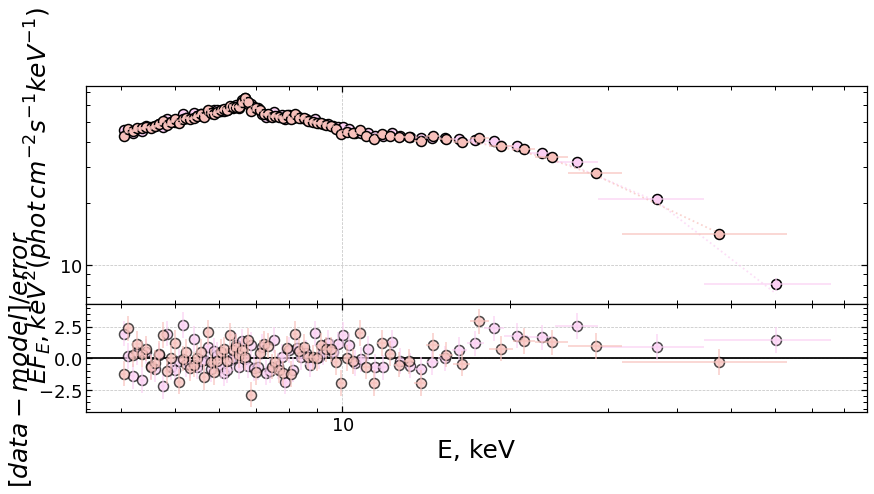

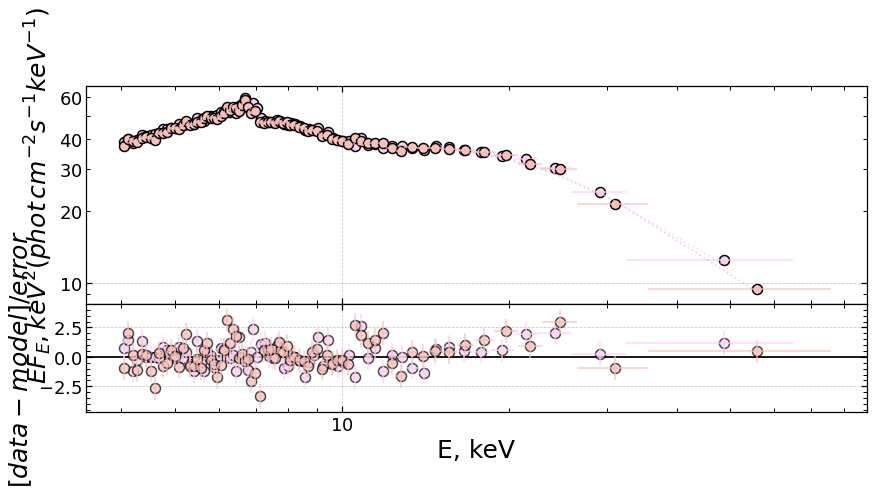

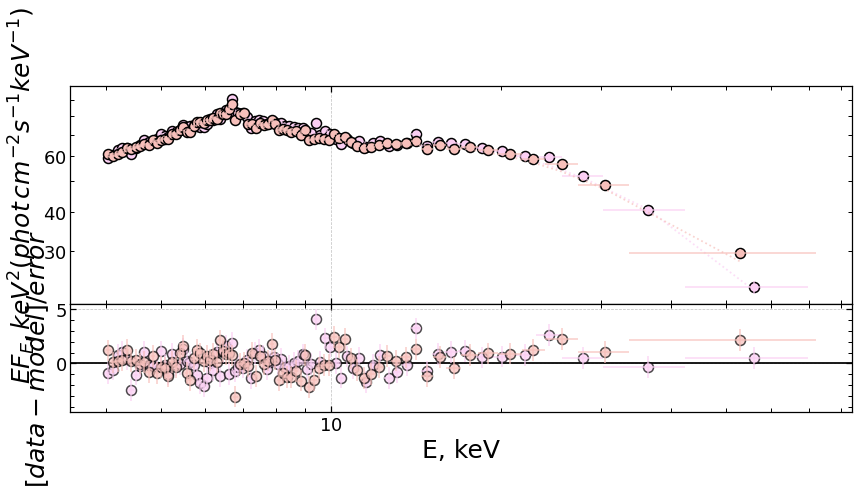

In [4]:
os.chdir(ph_res_folder)
create_dir('xspec')

model = mo_cutoffpl_loaded
model_name = 'cutoffpl'
for binnum in range(1,11):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = False, calc_errors=calc_errors, perturb_fit_sigma=0.1)


#### plot results

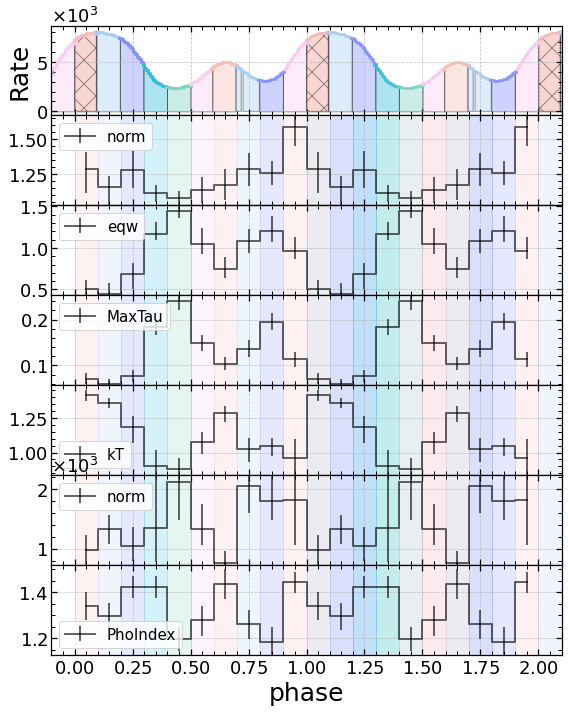

In [5]:
os.chdir(ph_res_folder)
model_name = 'cutoffpl'
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
ph_res_results_reind.head(25)



fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(7, sharex=True, figsize  = (8, 10))


efolds = glob('*.efold')
_, phase_colors = nu_obs.check_efold_of_bins(prodpath='phase_resolved', efolds_files = efolds, fiducial = None , ax_efold = ax0, fig = fig, save = False, legend=False, phase_zero_efold='phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold')



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]
ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', colors = phase_colors, lw = 2, ax = ax1)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'eqw', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2,  colors = phase_colors, ax = ax2)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'edge',     par =  'MaxTau', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors, ax = ax3)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'kT', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax4)

df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2,  colors = phase_colors, ax = ax5)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'cutoffpl',     par =  'PhoIndex', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax6)



fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
fig.savefig(f'xspec/{model_name}/ph_res_param_{model_name}.png')

### spectral ratio

['phase_resolved_bin5A_sr.pi', 'phase_resolved_bin2A_sr.pi', 'phase_resolved_bin9A_sr.pi']
fitting done
fitting done
fitting done


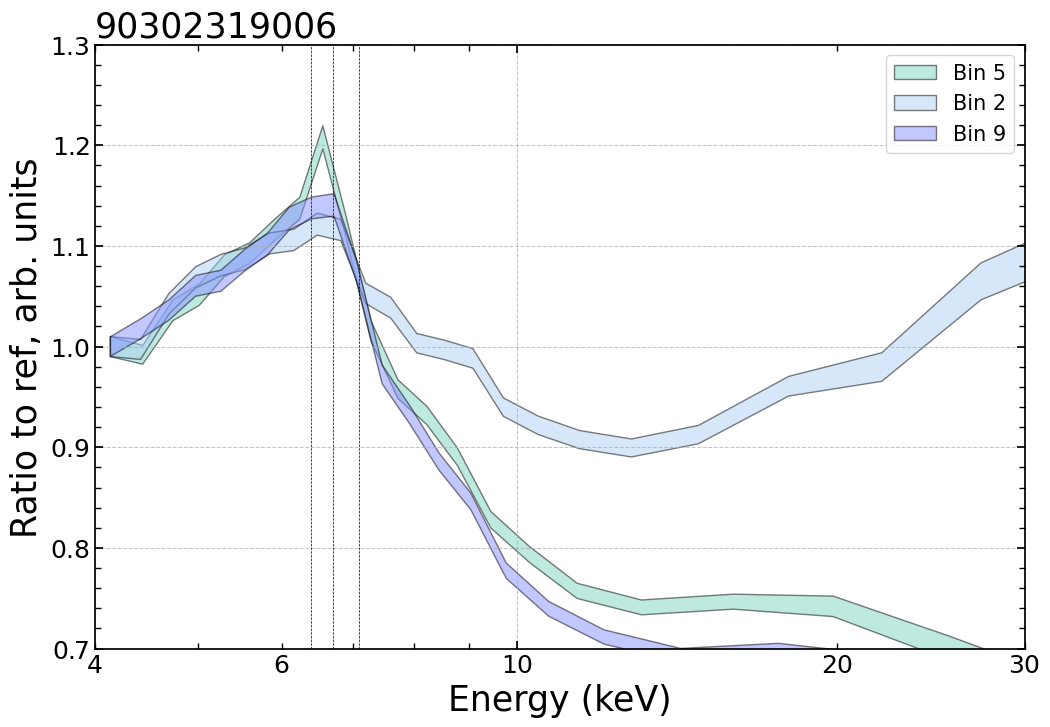

In [ ]:
from python_for_nustar.nu_core import plot_spe_ratio

mo_cutoffpl = Model("cutoffpl")
mo_cutoffpl.cutoffpl.PhoIndex = '1.36 -1'
mo_cutoffpl.cutoffpl.HighECut = '20 -1' # ,, 0.1, 0.2, 3, 4'

fig = plot_spe_ratio(model = mo_cutoffpl, ph_res_folder = ph_res_folder, bins_number=[5,2,9], zoom_rat = [0.7, 1.3], title = ObsID, min_sig=100, min_bin = 100, colors = phase_colors)

In [ ]:
# #bins = ['6', '4', '9']
# bins = ['6', '9']
# fig = make_grppha_and_wd(folder=ph_res_folder+'/', pha_files=[
#     f'phase_resolved_bin{bin}A_sr.pha' for bin in bins], NCHAN_1=5, NCHAN_2=25, en_split=10., labels=[f'bin {bin}' for bin in bins], title=ObsID)
# fig.savefig(ph_res_folder+'/xspec/ph_res_spe_ratio.png')


